In [2]:
import pandas as pd

data_source = pd.read_csv('./car-euro-edited.csv', header=0)
data_target = pd.read_csv('./car-japan-edited.csv', header=0)

In [ ]:
import os

import numpy as np
import pandas as pd
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from alexnet_pytorch import AlexNet

torch.multiprocessing.set_sharing_strategy('file_system')

model = AlexNet.from_pretrained('alexnet')

def transform(img):
    img = img.resize((224, 224)).convert('RGB')
    tensor = ToTensor()(img)
    return tensor

train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = transform,
)

data_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=128,
                                          shuffle=True,
                                          num_workers=1)

count = 0
output_path = 'data/preprocessed_train.csv'
os.remove(output_path)
for batch, digit in data_loader:
    data = []
    label = []
    for idx, img in enumerate(batch):
        features = model.extract_features(img.reshape((1, 3, 224, 224)))
        data.append(features.detach().numpy().reshape((256 * 6 * 6)))
        label.append(digit[idx].item())
    dtf = pd.DataFrame(data=data)
    label_dtf = pd.DataFrame(data=label, columns=['digit'])
    full = pd.concat([dtf, label_dtf], axis=1)
    print('label', full.digit.unique())
    full.to_csv(output_path, mode='a',
                header=not os.path.exists(output_path), index=False)

    count += 1
    print(count)

In [ ]:
import pandas as pd
import xgboost as xgb
import joblib


dtf = pd.read_csv('data/preprocessed_10000.csv')
features = dtf.columns[~dtf.columns.isin(['digit'])]
# keep only feature columns

model = xgb.XGBClassifier()

# Train using features and labels
model.fit(dtf[features], dtf['digit'])

# store model for further use
joblib.dump(model, 'data/model.pkl')

# Evaluate model
dtf_test = pd.read_csv('data/preprocessed_test.csv')
preds = model.predict(dtf_test[features])

print(list(dtf_test['digit'][:20]))
# > [1, 7, 8, 6, 7, 1, 1, 2, 7, 7, 1, 6, 0, 7, 5, 2, 2, 0, 7, 3]
print(list(preds[:20]))
# > [1, 7, 8, 6, 7, 1, 1, 2, 7, 7, 1, 6, 0, 7, 5, 2, 2, 0, 7, 3]

Try using xgboost

In [3]:
features = data_source[['Weight','Horsepower']]
labels = data_source[['Selected']]

In [4]:
import pandas as pd
import xgboost as xgb
import joblib

model = xgb.XGBClassifier()

# Train using features and labels
model.fit(features, labels)

# store model for further use
joblib.dump(model, 'testmodel.pkl')

['testmodel.pkl']

In [5]:
# Evaluate model
target_feature = data_target[['Weight','Horsepower']]

preds = model.predict(target_feature)

print(list(preds))
print(list(data_target['Selected']))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


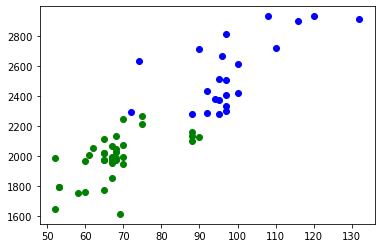

In [6]:
data1 = data_target[data_target['Selected']==1]
data2 = data_target[data_target['Selected']==0]
import matplotlib.pyplot as plt
plt.scatter(data1['Horsepower'], data1['Weight'],c='b')
plt.scatter(data2['Horsepower'], data2['Weight'],c='g')
plt.show()

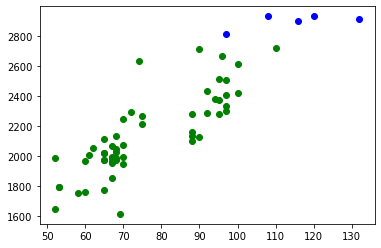

In [7]:
data1 = data_target[preds==1]
data2 = data_target[preds==0]
import matplotlib.pyplot as plt
plt.scatter(data1['Horsepower'], data1['Weight'],c='b')
plt.scatter(data2['Horsepower'], data2['Weight'],c='g')
plt.show()

In [8]:
data1

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Selected
50,datsun 810,22.0,6,146,97,2815,14.5,1977,Japan,1
55,toyota mark ii,19.0,6,156,108,2930,15.5,1976,Japan,1
57,toyota cressida,25.4,6,168,116,2900,12.6,1981,Japan,1
58,datsun 810 maxima,24.2,6,146,120,2930,13.8,1981,Japan,1
59,datsun 280-zx,32.7,6,168,132,2910,11.4,1980,Japan,1
